<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/5_1_%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80%EC%99%80_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

In [3]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [4]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 5 모델 평가와 성능 향상

모델과 메개변수 선택에 대해 알아보자.
모델이 훈련 세트에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘하느냐가 중요하다. 이번 장에서는 두 가지 관점에서 이 평가 방법을 확장해보겠다. 
 1. 안정적인 일반화 성능 측정 방법 > 교차검증
 2. 매개변수 튜닝하여 일반화 성능 개선 > 그리드 서치




In [5]:
# 기존 예시

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


## 5.1 교차 검증

일반화 성능을 재기 위해 훈련 셋 테스트셋 한 번 나누는 것보다. 더 안정적이고 뛰어난 검증. 가장 널리 사용되는 k-겹 교차 검증.
k는 보통 5-10 겹 사용. 

- 예시
\
5-겹 : 데이터를 폴드 5개로 나누고, 한 개가 테스트 셋이 되고 다른 4은 훈련셋이 되어, 모두 돌아가며 교차검증을 한다.

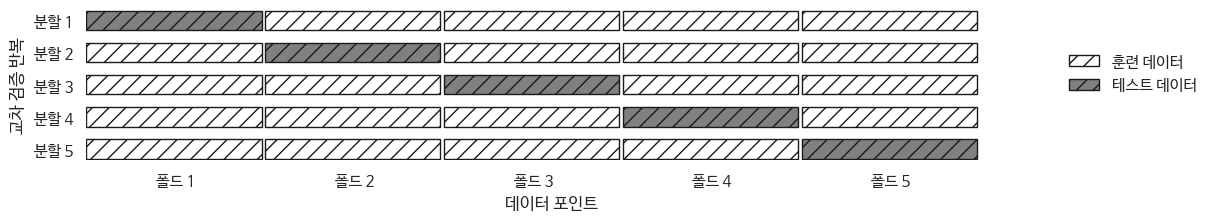

In [6]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증
scikit-learn의 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현되어있다. cross_val_score 함수의 매개 변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블이다. lris 데이터셋 적용 LogisticRegression 을 평가


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

# 5겹 검증

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


In [8]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)#10겹
print("교차 검증 점수:", scores)

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [9]:
# 교차검증 정확도 확인은 간단히 평균을 사용한다.
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


하지만 검증 데이터를 보면 1 에서 0.93 까지 비교적 차이가 크다. 
이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문 일수 있다.

\
검증에는 cross_val_score 뿐 아니라 cross_validate 함수를 사용하기도 한다. val_score과 비슷하기도 하지만 훈련과 테스트에 걸린시간을 담은 딕셔너리를 반환한다.(테스트 점수는 물론, 설정에 따라 훈련 점수도 얻을 수 있다)


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)

res

{'fit_time': array([0.034, 0.034, 0.024, 0.027, 0.026]),
 'score_time': array([0.001, 0.001, 0.001, 0.001, 0.001]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

팬더스를 사용하여 결괏값을 출력하고 평균을 계산해보자

In [11]:
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.03,5.24e-04,0.97,0.97
1,0.03,5.64e-04,1.00,0.97
2,0.02,5.02e-04,0.93,0.98
3,0.03,5.36e-04,0.97,0.98
4,0.03,5.20e-04,1.00,0.97


In [12]:
print("평균 시간과 점주: \n", res_df.mean())

평균 시간과 점주: 
 fit_time       2.89e-02
score_time     5.29e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


#### 5.1.2 교차검증에 장점

- 샘플에 편향을 방지하여 우연히 더 높게 혹은 낮게 성능이 나온걸 피할 수 있다
- 최악과 최선의 경우 성능을 알 수 있다. 모델 훈련 데이터에 따라 성능이 민감하게 변한다.
- 분할은 겹수가 증가함에 따라 데이터를 더 효과적으로 사용할 수 있다
 /일반 75% / 5겹 80% / 10겹 90%/ 활용

#### 단점

\
연산 비용이 늘어난다는 것. k 만큼에 모델을 만들어야 함으로 데이터를 한 번 나눴을 때보다 대략 k 만큼 시간이 거린다. 


\
#### 5.1.3 k겹 교차 검증과 그외 전략들
k 겹이 항상 좋은 결과를 내진 않는다.

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


분할 시, 첫번째 반복에서, 테스트는 0만 훈련은 1, 2만 가지게 된다. 
이 경우 단순한 k겹 교차 검증에는 문제가 있으니 scikit-learn 분류의 경우 **계층별 k-겹 교차 검증**을 사용한다. 그림은 다음과 같다.

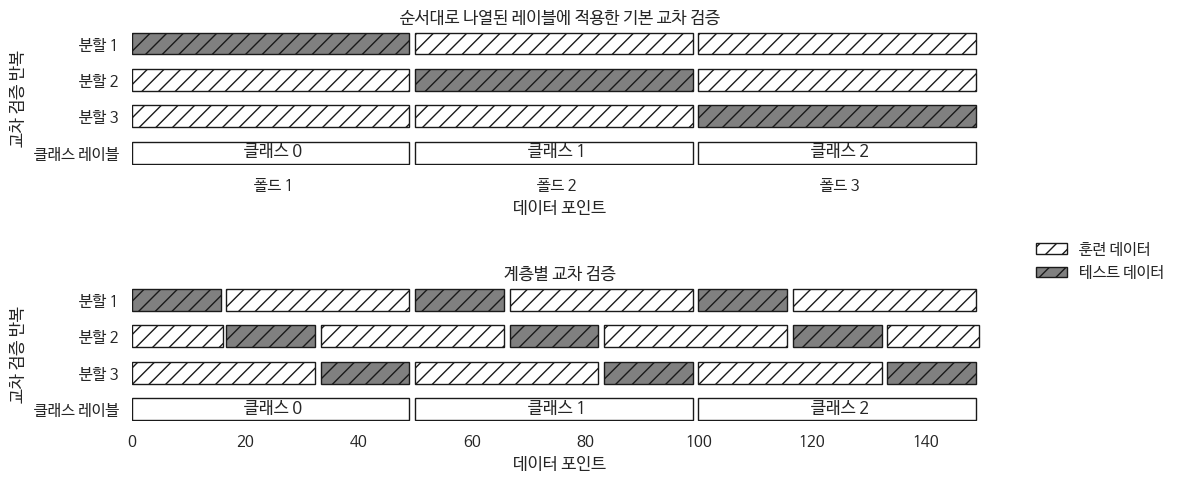

In [14]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

cross_val_score 를 사용할 때 cv 매개변수를 이용해 폴드의 개수를 조정해보았다. 그러나 scikit-learn에서는 cv 매개변수에 **교차 검증 분할기** 를 전달함으로서 데이터를 분할 할때 더 세밀하게 제어할 수 있다.

일반적인 경우, 회귀는 k-겹 교차 검증, 분류에선 계층별 k-겹 교차검증의 기본값이 잘 작동한다.

\
하지만, 조금 다른 전략이 필요할 때가있다.
다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용해야 할때 이다. 이렇게 하려면, 먼저 model_selection  모듈에서 KFOLD 분할기를 임포트하고 우너하는 폴드의 수를 넣어 객체를 생성한다.

In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [16]:
print("교차 검증 점수:\n",  cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.    1.    0.867 0.933 0.833]


In [17]:
# 3겹 교차검증은 좋은 방법이 아니다. 
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n",
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


In [18]:
# 데이터를 뒤죽박죽 섞어주자,
# 분할적 섞어주기 KFold shuffle True
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n",
    cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


#### LOOCV

또 다른 교차 검증 방법으론 LOOCV 가 자주 사용된다. 폴드 하나에 샘플 하나만 들어있는 K겹 교차 검증. 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용. 데이터가 클때 시간이 매우 오래걸리지만, 작은 데이터셋에선 이따금 더 좋은 결과를 만든다.

In [19]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


### 임의 분할 교차 검증

train size point 로 trainset 만들고 test size point 만큼 testset (trainset과 중첩되지 않게)만든다. 이 분할은 n_splits  point 반복한다.

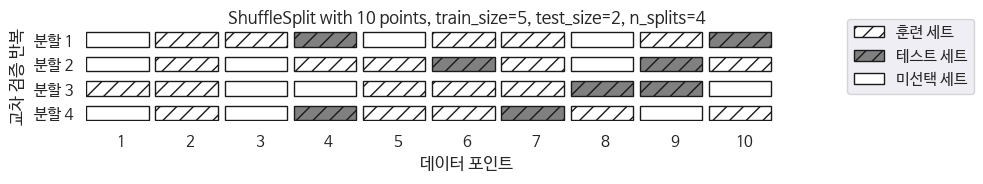

In [20]:
# image

mglearn.plots.plot_shuffle_split()

In [23]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv= shuffle_split)
print("교차 검증 점수: \n", scores)

교차 검증 점수: 
 [0.947 0.947 0.987 0.96  0.973 0.96  0.96  0.96  0.96  0.973]


#### 그룹별 교차 검증
데이터 안에 연관된 그룸이 있을 때도 교차검증 사용. 사진의 사람이 누군지 기록한 배열을 groups 매개변수로 전달받을 수 있다.

In [25]:
from sklearn.model_selection import GroupKFold
# artificial data set
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플 같은 그룹
# 다음 네 개 샘플도 또 다른 그룹
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수: \n", scores)

교차 검증 점수: 
 [0.75  0.6   0.667]


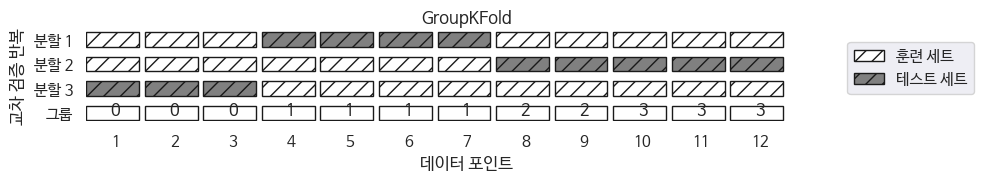

In [26]:
mglearn.plots.plot_group_kfold()

#### 반복 교차 검증
데이터셋의 크기가 크지 않을 경우, 한정된 검증 점수를 얻기위해 교차 검증을 반복하여 여러번 수행하는 경우

In [29]:
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

# 전체 검증 점수는 n_splits x n_repeats 개수 만큼 만들어진다.
# 기본은 5 x 10 = 50개 모델을 훈련하여 평가한 점수를 반영한다.
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print("교차 검증 점수:\n", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

교차 검증 점수:
 [1.    0.967 0.933 1.    0.933 0.967 0.967 0.933 1.    0.967 0.933 1.
 1.    0.967 0.967 0.9   1.    1.    0.933 0.967 0.933 0.967 0.967 1.
 0.967 1.    0.967 0.967 0.9   1.    0.967 0.967 0.967 0.967 0.933 0.967
 0.967 1.    1.    0.9   0.967 1.    0.9   0.967 0.967 0.9   0.967 0.967
 1.    0.967]
교차 검증 평균 점수: 0.965
